# Preprocess Data
- Plot the data.
- Make the data balanced by undersampling.
- Dump to huggingface datasets.

Dataset: https://huggingface.co/datasets/AlekseyDorkin/extended_tweet_emojis/tree/main


## 1. Install Dependencies

In [2]:
# you might want to restart the kernel after installation is complete.
!pip install datasets jupyter jupyter_client wandb --upgrade --quiet

## 2. Load Data

In [3]:
from datasets import load_dataset, Dataset

dataset = load_dataset("AlekseyDorkin/extended_tweet_emojis")
df_train = dataset["train"].to_pandas()
df_val = dataset["validation"].to_pandas()

Using custom data configuration AlekseyDorkin--extended_tweet_emojis-9d4b19d0fde1050c
Reusing dataset parquet (/root/.cache/huggingface/datasets/AlekseyDorkin___parquet/AlekseyDorkin--extended_tweet_emojis-9d4b19d0fde1050c/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

## 3. Plot Data

In [4]:
import matplotlib.pyplot as plt

def plot(df):
    df["label"].value_counts().plot(kind = 'bar')

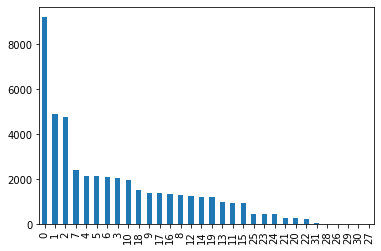

In [5]:
plot(df_train)


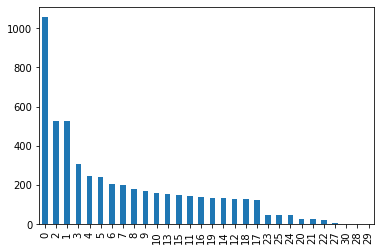

In [6]:
plot(df_val)

In [7]:
def limit_emojis(df, limit=20):
    df = df[df["label"] < limit]
    plot(df)
    return df

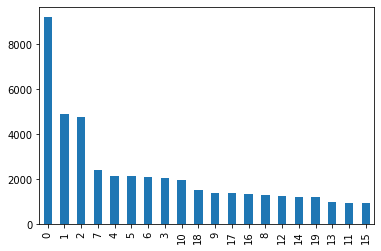

In [8]:
df_train_limit = limit_emojis(df_train)

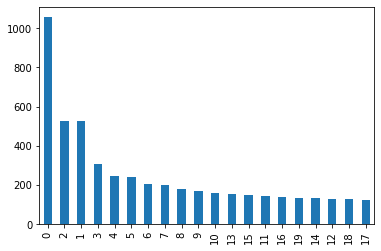

In [9]:
df_val_limit = limit_emojis(df_val)

## 4. Undersample

In [10]:
def under_sample(df):
    lowest_no_rows = min([x[1].shape[0] for x in df.groupby("label")])
    print(f"lowest no of rows: {lowest_no_rows}")
    df = df.groupby("label", as_index=False).apply(lambda x : x.sample(n=lowest_no_rows, replace=False, axis=0)).reset_index(drop=True)
    plot(df)
    return df


lowest no of rows: 934


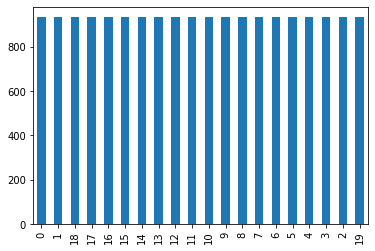

In [11]:
df_train_undersample = under_sample(df_train_limit)

lowest no of rows: 121


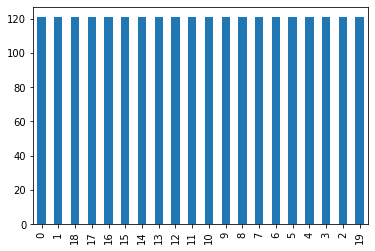

In [12]:
df_val_undersample = under_sample(df_val_limit)

In [13]:
SEED = 42 # use the same seed as in step 01
TEST_SIZE = 0.2 # use the same as in step 01
train_test_dataset = Dataset.from_pandas(df_train_undersample).train_test_split(test_size=TEST_SIZE, seed=SEED)
train_test_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 14944
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3736
    })
})

In [14]:
train_test_dataset["validation"] = Dataset.from_pandas(df_val_undersample)

In [15]:
train_test_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 14944
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3736
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2420
    })
})

## 5. Push to Huggingface Hub.

In [29]:
train_test_dataset["validation"] = Dataset.from_pandas(df_val_undersample)

In [30]:
train_test_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 14944
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3736
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2420
    })
})

## 5. Push to Huggingface Hub.

In [31]:
train_test_dataset.push_to_hub("vincentclaes/emoji-predictor")

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/huggingface_hub/hf_api.py:1948: FutureWarning: `identical_ok` has no effect and is deprecated. It will be removed in 0.11.0.
  warnings.warn(
Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split validation to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]